In [1]:
import os
if 'src' != os.getcwd().split('/')[-1]:
    os.chdir('../src')

os.getcwd()
import ep_finder, ep_utils, graphs, lep_finder, timing
import numpy as np
from scipy import sparse
import networkx as nx
import scipy.linalg as spla
from matplotlib import pyplot as plt

# Perform speed tests



			EDGES File Detected




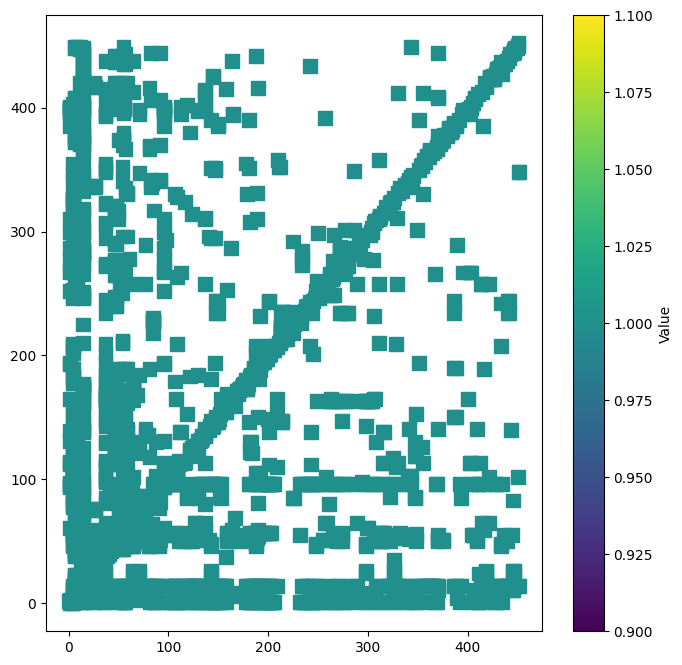

In [2]:
G = graphs.oneGraphToRuleThemAll('../Networks/RealWorld/bio-celegans-dir/bio-celegans-dir.edges',visualize=True,directed=True,suppress=True)

In [ ]:
real_nets = ['bio-celegans-dir.edges','bio-celegans.mtx','bio-diseasome.mtx','bio-grid-fruitfly.edges','bio-yeast-protein-inter.edges']
too_big = ['bn-human-BNU_1_0025890_session_1.edges','bn-human-Jung2015/bn-human-Jung2015_M87116523.edges']

base = '../Networks/RealWorld/'
for d in os.listdir(base):
    for f in os.listdir(base+d + '/'):
        if f in real_nets: 
            file = base+d+'/'+f
            print(file)
            G = graphs.oneGraphToRuleThemAll(file,directed=True,suppress=True)
            # print(np.allclose(G.todense(),G.todense().T))
            # timing each direction
            ep, t = timing.time_this(ep_utils.getEigenvaluesSparse,[G], ret_output=True)
            print('first: ',t)
            t = timing.time_this(ep_utils.getEigenvaluesSparse,[G.T])
            print('second: ',t)


../Networks/RealWorld/bio-celegans-dir/bio-celegans-dir.edges


			EDGES File Detected


first:  0.01393988897325471
second:  0.01327343104640022
../Networks/RealWorld/bio-celegans-ud/bio-celegans.mtx


			MTX File Detected


first:  0.1282965440186672
second:  0.13029441103572026
../Networks/RealWorld/bio-diseasome/bio-diseasome.mtx


			MTX File Detected


first:  0.09871686401311308
second:  0.09615228901384398
../Networks/RealWorld/bio-grid-fruitfly/bio-grid-fruitfly.edges


			EDGES File Detected


first:  112.54294312297134
second:  112.33036037097918
../Networks/RealWorld/bio-yeast-protein-inter/bio-yeast-protein-inter.edges


			EDGES File Detected


first:  0.9056551569956355
second:  0.9022343199467286


In [2]:
G = graphs.oneGraphToRuleThemAll('../Networks/RealWorld/bio-celegans-dir/bio-celegans-dir.edges',directed=True, suppress=True)
ep_utils.getPercentNonTrivial(G)



			EDGES File Detected




(46.35761589403973, 7.954545454545454, 210, 21)

In [3]:
ep_utils.getPercentNonTrivial(G.T)

(46.35761589403973, 7.954545454545454, 210, 21)

In [3]:
ep_utils.getPercentNonTrivial(G.T)

(46.35761589403973, 7.954545454545454)

In [ ]:
# real_nets = ['bio-celegans-dir.edges','bio-celegans.mtx','bio-diseasome.mtx','bio-grid-fruitfly.edges','bio-yeast-protein-inter.edges']
too_big = ['bn-human-BNU_1_0025890_session_1.edges','bn-human-Jung2015/bn-human-Jung2015_M87116523.edges']
real_nets = ['bio-celegans-dir.edges']

base = '../Networks/RealWorld/'
for d in os.listdir(base):
    for f in os.listdir(base+d + '/'):
        if f in real_nets: 
            file = base+d+'/'+f
            print(file)
            G = graphs.oneGraphToRuleThemAll(file,directed=True,suppress=True)
            print(G.shape[0])
            ep = ep_finder.getEquitablePartition(ep_finder.initFromSparse(G))
            perc = ep_utils.getPercentNonTrivial(G)
            print(perc)
            # triv_eps = [k for k in ep.keys() if sum(ep[k]) == 1]
            # tot_eps = len(ep.keys()) 
            # print((tot_eps - len(triv_eps)) / tot_eps)


../Networks/RealWorld/bio-celegans-dir/bio-celegans-dir.edges


			EDGES File Detected


453
264
(46.35761589403973, 210)


In [15]:
210/453

0.46357615894039733

In [57]:
G.T.todense()

array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [7]:
G = np.array([[0,1,0,0,0],
              [1,0,0,0,0],
              [1,1,0,0,0],
              [0,0,1,0,1],
              [0,0,0,1,0]])

G_big = spla.block_diag(*[G]*1)
# print(G_big.T)

# Gnx = nx.from_numpy_array(G,create_using=nx.DiGraph)

G = sparse.csr_array(G_big)
ep_nt = ep_finder.getEquitablePartition(ep_finder.initFromSparse(G))
lep = lep_finder.getLocalEquitablePartitions(lep_finder.initFromSparse(G),ep_nt)
print(lep)
# ep_tr = ep_finder.getEquitablePartition(ep_finder.initFromSparse(G.T))
# why is the algorithm finding it this way???

[[0, 1]]


## For some reason this does not give a proper equitable partition???

Seemss like when I transpose it, it finds the transmitting instead of receiving. Look in code, is there a reason for that.

In [8]:
print(ep_utils.getPercentNonTrivial(G))
print(ep_utils.getPercentNonTrivial(G.T))

(100.0, 100.0, 5, 2)
(100.0, 100.0, 5, 2)


{0: [2, 3, 4], 1: [0, 1]}


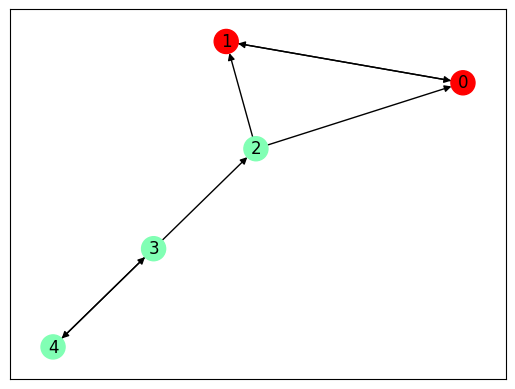

In [11]:
Gnx = nx.from_numpy_array(G,create_using=nx.DiGraph)
ep = ep_finder.getEquitablePartition(ep_finder.initFromSparse(G))
print(ep)
ep_utils.plotEquitablePartition(Gnx,ep)

In [5]:
t_nt = timing.time_this(ep_utils.getEigenvaluesSparse,[G])
t_tr = timing.time_this(ep_utils.getEigenvaluesSparse,[G.T])

In [7]:
print(t_nt,t_tr)

0.07115800608880818 0.05208341497927904


In [10]:
epn = ep_finder.getEquitablePartition(ep_finder.initFromSparse(G))
ept = ep_finder.getEquitablePartition(ep_finder.initFromSparse(G.T))

print([len(v) for v in epn.values()])
print([len(v) for v in ept.values()])

[400, 200, 400]
[400, 200, 400]


In [8]:
# ep = ep_finder.getEquitablePartition(ep_finder.initFromSparse(G.T))
#TODO: total nontrivial nodes AND total nontrivial partition elements. need to look at both.
print(ep_utils.getPercentNonTrivial(G))
print(ep_utils.getPercentNonTrivial(G.T))

(100.0, 100.0, 1000, 3)
(100.0, 100.0, 1000, 3)


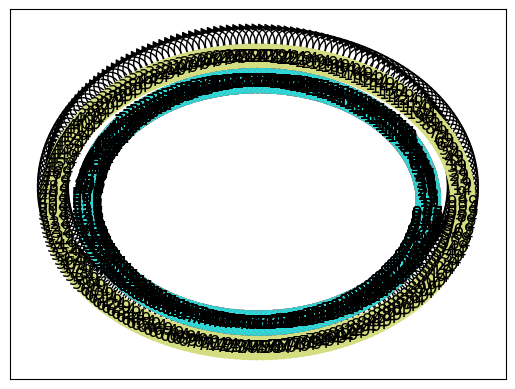

In [7]:
Gnx = nx.from_numpy_array(G.T,create_using=nx.DiGraph)
ep = ep_finder.getEquitablePartition(ep_finder.initFromSparse(G.T))
ep_utils.plotEquitablePartition(Gnx,ep)

In [18]:
triv = 0
for k,v in ep.items():
    if sum(v) == 1:
        triv += 1
    print(k,sum(v))
triv

0 12158
1 17074
2 1482
3 1907
4 125
5 200
6 104
7 145
8 190
9 348
10 109
11 182
12 343
13 130
14 64
15 56
16 65
17 81
18 137
19 11
20 12
21 55
22 50
23 57
24 54
25 48
26 46
27 6
28 8
29 37
30 14
31 4
32 2158
33 388
34 269
35 25
36 36
37 278
38 71
39 386
40 192
41 248
42 381
43 274
44 143
45 272
46 24
47 1546
48 107
49 51
50 179
51 332
52 209
53 108
54 98
55 3
56 370
57 351
58 1
59 369
60 400
61 80
62 85
63 88
64 104
65 189
66 878
67 513
68 134
69 164
70 147
71 165
72 188
73 212
74 425
75 362
76 219
77 304
78 113
79 243
80 83
81 59
82 92
83 286
84 257
85 77
86 213
87 96
88 256
89 74
90 183
91 383
92 103
93 374
94 135
95 410
96 354
97 181
98 58
99 63
100 450
101 69
102 84
103 250
104 242
105 255
106 264
107 52
108 375
109 124
110 158
111 266
112 41
113 15
114 402
115 403
116 214
117 150
118 412
119 422
120 298
121 325
122 330
123 217
124 441
125 315
126 316
127 201
128 341
129 112
130 116
131 122
132 355
133 389
134 262
135 265
136 149
137 159
138 306
139 178
140 133
141 326
142 119
143 

1

# Resume
## celegans-dir seems to me to have .99 nontriviality... why did the supercomputer say .13?